In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer as Imputer
%matplotlib inline

In [2]:
original_df = pd.read_csv('online_store_customer_data.csv')
df = original_df

In [3]:
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [5]:
# convert object types
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'])
df['Referal'] = df['Referal'].astype(bool)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_date  2512 non-null   datetime64[ns]
 1   Transaction_ID    2512 non-null   int64         
 2   Gender            2484 non-null   object        
 3   Age               2470 non-null   float64       
 4   Marital_status    2512 non-null   object        
 5   State_names       2512 non-null   object        
 6   Segment           2512 non-null   object        
 7   Employees_status  2486 non-null   object        
 8   Payment_method    2512 non-null   object        
 9   Referal           2512 non-null   bool          
 10  Amount_spent      2270 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 198.8+ KB


In [7]:
df.duplicated().sum()

12

In [8]:
duplicate_value = df.duplicated(keep='first')

In [9]:
print(df.isnull().sum())

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal               0
Amount_spent        242
dtype: int64


In [10]:
cols_to_remove = ['Transaction_ID']
df = df.drop(cols_to_remove, axis=1)
df.head()

,Transaction_date,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,2019-01-01,Female,19.0,Single,Kansas,Basic,Unemployment,Other,True,2051.36
1,2019-01-01,Male,49.0,Single,Illinois,Basic,self-employed,Card,False,544.04
2,2019-01-01,Male,63.0,Married,New Mexico,Basic,workers,PayPal,True,1572.60
3,2019-01-01,NaN,18.0,Single,Virginia,Platinum,workers,Card,True,1199.79
4,2019-01-01,Male,27.0,Single,Connecticut,Basic,self-employed,Card,False,NaN


In [11]:
# Replace null values with mean values in Age and Amount_spent categories
cols_to_clean =['Age', 'Amount_spent']

imputer = Imputer()
df[cols_to_clean] = imputer.fit_transform(df[cols_to_clean])

df['Age'] = df['Age'].astype(int)

In [12]:
df['Referal'] = df['Referal'].fillna(0)

In [13]:
df['Employees_status'] = df['Employees_status'].fillna('not disclosed')
df['Gender'] = df['Gender'].fillna('Other')

In [14]:
print(df.isnull().sum())

Transaction_date    0
Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2512.0,46.626990,18.033725,15.00,32.0000,46.000000,62.0000,78.00
Amount_spent,2512.0,1418.422577,835.101648,2.09,734.8625,1418.422577,1955.9975,2999.98


In [16]:
df.describe(include=object).T

,count,unique,top,freq
Gender,2512,3,Female,1356
Marital_status,2512,2,Married,1473
State_names,2512,50,Illinois,67
Segment,2512,5,Basic,1136
Employees_status,2512,5,Employees,946
Payment_method,2512,3,PayPal,1168


In [17]:
df.corr()

,Age,Referal,Amount_spent
Age,1.000000,0.012578,-0.021856
Referal,0.012578,1.000000,-0.009089
Amount_spent,-0.021856,-0.009089,1.000000


Amount spent and Age have slight negative correlation, otherwise small correlations

In [18]:
df.nlargest(5, 'Amount_spent')

,Transaction_date,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
17,2019-01-07,Female,77,Married,New Mexico,Platinum,workers,Card,False,2999.98
485,2019-06-07,Male,65,Married,Arizona,Gold,self-employed,PayPal,True,2998.62
2279,2021-02-15,Female,78,Single,Arizona,Silver,Employees,PayPal,True,2997.21
589,2019-07-13,Male,51,Single,North Carolina,Missing,Employees,PayPal,True,2997.15
743,2019-08-30,Male,44,Single,Illinois,Basic,Employees,Card,True,2996.82


We can see that the 5 biggest transactions were made by people aged 40 and over

Next we will take a look at how the different payment methods are represented in the data

In [19]:
df['Payment_method'].unique()

array(['Other', 'Card', 'PayPal'], dtype=object)

In [20]:
# Select all rows with payment types
payment_methods = df.loc[:,['Amount_spent','Payment_method']]

card = payment_methods[payment_methods['Payment_method'] == 'Card' ]

paypal = payment_methods[payment_methods['Payment_method'] == 'PayPal']

other = payment_methods[payment_methods['Payment_method'] == 'Other']


result = [card, paypal, other]
result_concat = pd.concat([card, paypal, other], keys={'Card': card,
                                                        'Paypal': paypal,
                                                        'Other': other,})
sum_card = sum(card['Amount_spent'])
sum_paypal = sum(paypal['Amount_spent'])
sum_other = sum(other['Amount_spent'])

# Printing all purchases with each payment type
print(f"Sum of purchases with Card payments is {sum_card:.2f}$")
print(f"Sum of purchases with PayPal is {sum_paypal:.2f}$")
print(f"Sum of purchases with Other payment methods is {sum_other:.2f}$")

Sum of purchases with Card payments is 1046943.46$
Sum of purchases with PayPal is 1654891.97$
Sum of purchases with Other payment methods is 861242.08$


In [21]:
# Get the total number of transactions for each payment type
payment_values = df['Payment_method'].value_counts().to_frame()
print(payment_values)

        Payment_method
PayPal            1168
Card               749
Other              595


Text(0.5, 1.0, 'Total number of payments with each method')

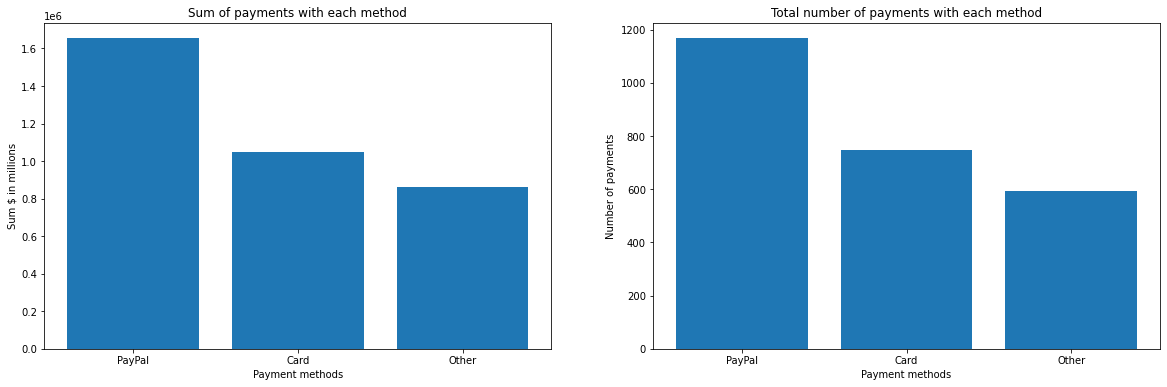

In [22]:
x = ['PayPal', 'Card', 'Other']
y = [sum_paypal, sum_card, sum_other]

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.bar(x, y)
ax1.set_xlabel('Payment methods')
ax1.set_ylabel('Sum $ in millions')
ax1.set_title('Sum of payments with each method')

ax2.bar(x, df['Payment_method'].value_counts())
ax2.set_xlabel('Payment methods')
ax2.set_ylabel('Number of payments')
ax2.set_title('Total number of payments with each method')

Paypal is clearly the most used payment method

Next we will look at the amount spent between customer segments

In [23]:
# Select all rows with payment types
segments = df.loc[:,['Amount_spent','Segment']]
plat = segments[segments['Segment'] == 'Platinum' ]
gold = segments[segments['Segment'] == 'Gold' ]
silver = segments[segments['Segment'] == 'Silver' ]
basic = segments[segments['Segment'] == 'Basic' ]
missing = segments[segments['Segment'] == 'Missing' ]


result = [plat, gold, silver, basic, missing]
result_concat = pd.concat([plat, gold, silver, basic, missing], keys={'Platinum': plat,
                                                                     'Gold' : gold,
                                                                    'Silver' : silver,
                                                                     'Basic' : basic,
                                                                     'Missing' : missing})
sum_plat = sum(plat['Amount_spent'])
sum_gold = sum(gold['Amount_spent'])
sum_silver = sum(silver['Amount_spent'])
sum_basic = sum(basic['Amount_spent'])
sum_missing = sum(missing['Amount_spent'])

print(sum_plat)
print(sum_gold)
print(sum_silver)
print(sum_basic)
print(sum_missing)

642819.4862775326
343993.39958149777
692192.3568942726
1604367.9574008812
279704.3135022025


In [24]:
df['Segment'].value_counts()

Basic       1136
Silver       490
Platinum     443
Gold         247
Missing      196
Name: Segment, dtype: int64

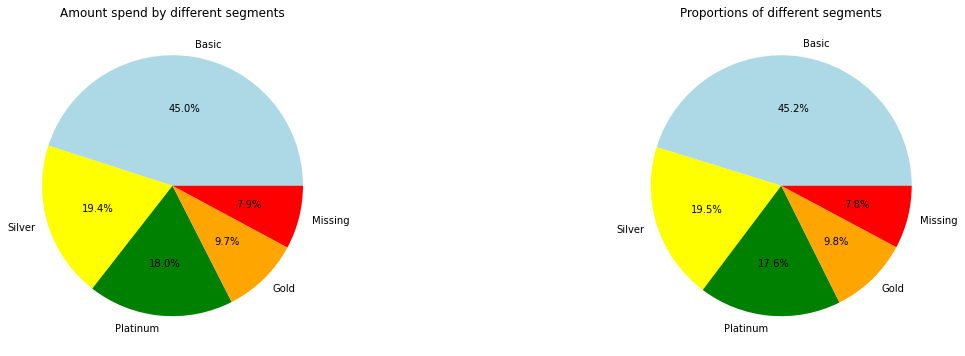

In [25]:
x = ['Basic', 'Silver','Platinum', 'Gold', 'Missing']
y = [sum_basic, sum_silver, sum_plat, sum_gold, sum_missing]

colors=['lightblue', 'yellow', 'green', 'orange', 'red']

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax2 = df['Segment'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
ax2.set_ylabel('')
ax2.set_title('Proportions of different segments')


ax1.pie(y, labels=x, colors=colors, autopct='%1.1f%%')
ax1.set_title('Amount spend by different segments')


plt.show()

There are no major differences in amount spend by different segments compared to the proportions of the segments. New bonuses to different segments should be taken into consideration, as right now for example being in Platinum segment has not raised the amount spent significantly.